In [1]:

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import splitfolders
import graphviz 
import pydot
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

import numpy as np
import PIL.Image
import sys
from PIL import Image


In [3]:
#splitfolders.ratio("mushroom",'all_spl', seed=54, ratio = (0.6, 0.01, 0.39),group_prefix=None)
splitfolders.ratio("!deadly",'mush_3neuro/2st_d', seed=5, ratio = (0.6, 0.01, 0.39),group_prefix=None)
splitfolders.ratio("!edible",'mush_3neuro/2st_e', seed=5, ratio = (0.6, 0.01, 0.39),group_prefix=None)

Copying files: 4825 files [00:07, 673.79 files/s]
Copying files: 2581 files [00:03, 669.17 files/s]


In [2]:
dir_test2='mush_3neuro/2st_d/test'
dir_train2='mush_3neuro/2st_d/train'


In [2]:
dir_test2e='mush_3neuro/2st_e/test'
dir_train2e='mush_3neuro/2st_e/train'


In [4]:
dir_test='mush_3neuro/1st/test'
dir_train='mush_3neuro/1st/train'


In [3]:
h=128
w=128

In [4]:
data_generator = ImageDataGenerator(
    
    rescale=1/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
    
    #fill_mode='nearest'
   
    
    )

In [7]:
train_data = data_generator.flow_from_directory(
    dir_train,
    target_size=(h, w),
    batch_size=30,
    class_mode='sparse' # class_mode='categorical sparse'
)
test_data = data_generator.flow_from_directory(
    dir_test,
    target_size=(h, w),
    batch_size=30,
    class_mode='sparse'
)

Found 4440 images belonging to 2 classes.
Found 2962 images belonging to 2 classes.


In [5]:
train_data2e = data_generator.flow_from_directory(
    dir_train2e,
    target_size=(h, w),
    batch_size=30,
    class_mode='sparse' # class_mode='categorical sparse'
)
test_data2e = data_generator.flow_from_directory(
    dir_test2e,
    target_size=(h, w),
    batch_size=30,
    class_mode='sparse'
)

Found 1528 images belonging to 48 classes.
Found 1049 images belonging to 48 classes.


In [5]:
train_data2 = data_generator.flow_from_directory(
    dir_train2,
    target_size=(h, w),
    batch_size=30,
    class_mode='sparse' # class_mode='categorical sparse'
)
test_data2 = data_generator.flow_from_directory(
    dir_test2,
    target_size=(h, w),
    batch_size=30,
    class_mode='sparse'
)

Found 2872 images belonging to 62 classes.
Found 1930 images belonging to 62 classes.


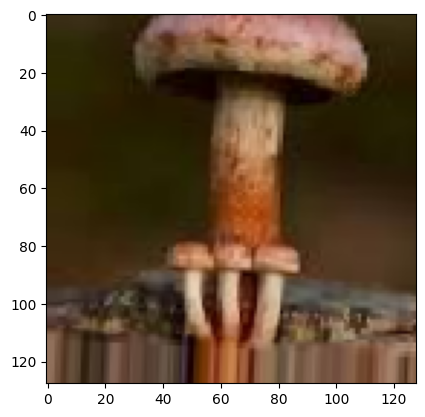

In [10]:
train_data2[0][0].shape
test_data2[0][0].shape
plt.imshow(train_data2[5][0][0])


In [72]:
model1st_2t = Sequential([
                    Conv2D(32, 5, padding='same', activation='relu', input_shape=(h, w, 3)),
                    MaxPool2D((2, 2)),
 

                    Conv2D(
                        filters=64,
                        kernel_size=5,
                        strides=1,
                        padding='same',
                        activation='relu',
                    ),
                    MaxPool2D((2, 2)),
                    Dropout(0.25),


                    Conv2D(126, 5, padding='same', activation='relu'),
                    MaxPool2D((2, 2)),
                    Dropout(0.25),
                    
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(2, activation='softmax')
])

model1st_2t.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
#plot_model(model1st, show_shapes=True)
model1st_2t.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 126)      

In [74]:
model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: name 'model' is not defined

In [71]:
history1st_2t=model1st_2t.fit(train_data, epochs=100, validation_data=test_data)

Epoch 1/20
148/148 [==============================] - 74s 494ms/step - loss: 0.7361 - accuracy: 0.6417 - val_loss: 0.6444 - val_accuracy: 0.6512
Epoch 2/20
148/148 [==============================] - 69s 466ms/step - loss: 0.6415 - accuracy: 0.6514 - val_loss: 0.6402 - val_accuracy: 0.6512
Epoch 3/20
148/148 [==============================] - 70s 470ms/step - loss: 0.6392 - accuracy: 0.6523 - val_loss: 0.6408 - val_accuracy: 0.6512
Epoch 4/20
148/148 [==============================] - 71s 481ms/step - loss: 0.6332 - accuracy: 0.6561 - val_loss: 0.6338 - val_accuracy: 0.6651
Epoch 5/20
148/148 [==============================] - 69s 468ms/step - loss: 0.6286 - accuracy: 0.6574 - val_loss: 0.6226 - val_accuracy: 0.6641
Epoch 6/20
148/148 [==============================] - 73s 491ms/step - loss: 0.6240 - accuracy: 0.6642 - val_loss: 0.6325 - val_accuracy: 0.6502
Epoch 7/20
148/148 [==============================] - 69s 469ms/step - loss: 0.6216 - accuracy: 0.6673 - val_loss: 0.6223 - val_ac

In [76]:
model1st_2t.save('model_class2_acc68_66_20ec.h5')

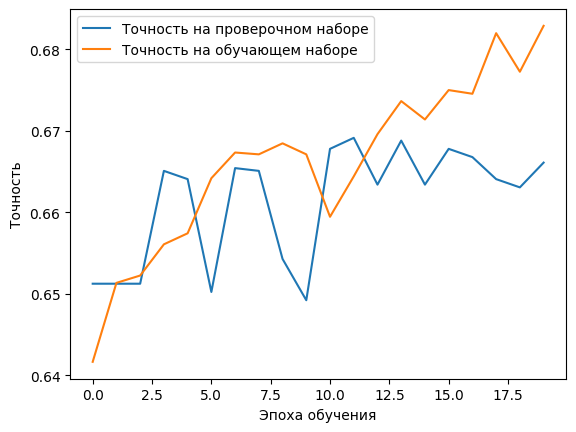

In [75]:
plt.plot(history1st_2t.history['val_accuracy'], label='Точность на проверочном наборе')
plt.plot(history1st_2t.history['accuracy'], label='Точность на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
class_1st = {0: 'Dead', 1: 'Alive'}

In [ ]:
#classes = sorted(os.listdir('mush_3neuro/2st_d/test'))[:-1]
directory = "mush_3neuro/2st_d/test"

files = os.listdir(directory)

class_2st_de = {}

for file in files:
    class_2st_de[file] = ""

print(class_2st_de)
#classes = sorted(os.listdir('mush_3neuro/2st_e/test'))[:-1]


In [9]:
directory2 = "mush_3neuro/2st_d/test"

files = os.listdir(directory2)

class_2st_ed = {}

for file in files:
    class_2st_ed[file] = ""

print(class_2st_de)

NameError: name 'class_2st_de' is not defined

In [32]:
#image = load_img('D:/TESTING/tets1.jpg', target_size=( h, w))

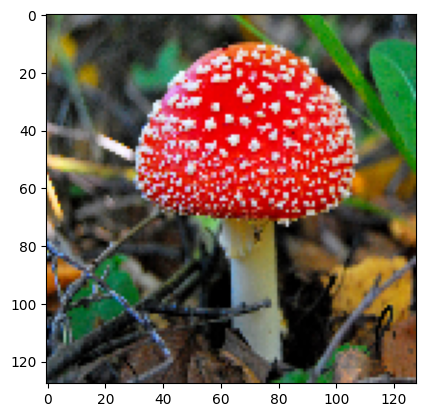

In [49]:
plt.imshow(image)

In [41]:
#image = tf.keras.utils.load_img(image_path)
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model1st.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 40ms/step
[[1. 0.]]


In [22]:
#image = load_img('C:\Users\Никита\Desktop\mush_presne\TESTING\test1', target_size=(h, w))
image = load_img('D:/TESTING/test2.jpg', target_size=( h, w))

image_array = img_to_array(image)

image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255


#model = load_model('my_model.h5')


res = model1st.predict(image_array)
#result=[]
#for clas in res:
#    result.append(class_1st[clas])
nxt=predicted_class = np.argmax(res)
# Отобразим результат
print(nxt,res[0])

1/1 [==============================] - 0s 104ms/step
0 [1.0000000e+00 1.0032054e-08]


In [23]:
model1st = load_model('mush_3neuro/model_class2_acc94_68.h5')
model2st_d = load_model('mush_3neuro/model_class62d_acc85_35_50ec.h5')
##model2st_e = load_model('mush_3neuro/model_class2_acc94_68.h5')

In [25]:
image = load_img('D:/TESTING/test2.jpg', target_size=( h, w))

image_array = img_to_array(image)

image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255
res = model1st.predict(image_array)
nxt=predicted_class = np.argmax(res)
print(nxt,res[0])

1/1 [==============================] - 0s 115ms/step
0 [1.0000000e+00 1.0032054e-08]


In [26]:
res2d = model2st_d.predict(image_array)
nxt=predicted_class = np.argmax(res2d)
print(nxt,res2d[0])

1/1 [==============================] - 0s 22ms/step
2 [4.95790850e-17 1.33588109e-38 9.90869939e-01 6.63118789e-21
 1.71827941e-22 1.14185264e-35 6.19351893e-31 1.05597653e-09
 4.09263965e-29 6.25635259e-38 1.01318966e-27 4.04721541e-20
 9.28580540e-31 0.00000000e+00 1.00668226e-28 1.07422057e-10
 3.21585825e-09 1.93908944e-15 6.15123373e-15 2.20388724e-26
 1.32894364e-11 9.49271955e-37 4.75703340e-26 8.96607905e-32
 0.00000000e+00 3.10119776e-23 9.23402240e-12 4.50301120e-18
 3.01380413e-19 1.62208628e-31 7.98563363e-35 6.17292093e-18
 1.28062125e-19 9.52275772e-28 0.00000000e+00 7.04808565e-25
 3.10474889e-23 1.44138494e-27 6.47983179e-34 3.47062326e-29
 8.48743854e-21 1.92111044e-22 8.44688304e-18 6.09488542e-26
 4.23466956e-21 9.99739137e-31 1.83404971e-25 7.73692859e-28
 1.59815272e-10 3.23246677e-25 1.14207845e-10 1.00706790e-10
 9.27462054e-08 9.12824273e-03 4.16987268e-30 1.17409927e-31
 3.21804056e-29 1.46739662e-23 2.19339151e-29 2.39275932e-36
 0.00000000e+00 1.65093229e-06]

In [17]:
image = load_img('D:/TESTING/tets1.jpg', target_size=( h, w))


res2 = model2st_e.predict(image_array)
nxt=predicted_class = np.argmax(res2)
print(nxt,res2[0])

1/1 [==============================] - 0s 19ms/step
28 [1.63861302e-09 7.35608685e-10 3.75383643e-05 7.38252504e-14
 1.19505842e-06 5.97805047e-06 8.51545281e-07 2.43703340e-04
 5.21694354e-10 2.52776300e-10 2.95706862e-11 9.82499696e-05
 2.06839405e-02 6.15869994e-11 4.10723955e-10 1.38144107e-09
 3.93815562e-02 3.38952057e-04 3.47042423e-10 1.41691316e-07
 2.96881755e-11 1.05170844e-10 2.38229006e-13 5.68119753e-11
 2.02200226e-06 2.30774788e-10 1.35505047e-08 4.43801484e-09
 8.29839289e-01 1.57564606e-17 7.91201442e-02 8.29226410e-10
 1.95595294e-06 1.05379743e-03 1.51679451e-08 7.39972320e-14
 7.08237245e-12 2.53308929e-08 8.77021566e-09 2.49503188e-07
 1.27562613e-11 1.43871261e-02 1.05482452e-02 9.81025597e-15
 4.25464800e-03 8.34649190e-12 3.00173724e-07 2.66182978e-11
 2.62580935e-23 1.43630705e-24 3.77319547e-24 4.50992674e-19
 1.90013557e-24 2.33032094e-20 7.72233216e-24 2.20295916e-25
 9.60587010e-24 5.39985362e-21 2.98329827e-22 3.99556392e-24
 1.41951286e-18 2.22297797e-22

In [6]:
model2st_e = Sequential([
                    Conv2D(32, 5, padding='same', activation='relu', input_shape=(h, w, 3)),
                    #BatchNormalization(),
                    MaxPool2D((2, 2)),
                     Dropout(0.25),
 

                    #Conv2D(
                    #    filters=32,
                    #    kernel_size=5,
                   #     strides=1,
                   #     padding='same',
                   #     activation='relu',
                   # ),
                    #MaxPool2D((2, 2)),
                    #Dropout(0.25),
    
                    Conv2D(64, 5, padding='same', activation='relu'),
                #BatchNormalization(),
                    MaxPool2D((2, 2)),
                    Dropout(0.25),


                    Conv2D(126, 5, padding='same', activation='relu'),
                    MaxPool2D((2, 2)),
                    Dropout(0.25),
                    
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(48, activation='softmax')
])

model2st_e.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2st_e.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0

In [7]:
history2st_e=model2st_e.fit(train_data2e, epochs=50,batch_size=32, validation_data=test_data2e)

Epoch 1/50
51/51 [==============================] - 34s 650ms/step - loss: 3.8459 - accuracy: 0.0681 - val_loss: 3.7645 - val_accuracy: 0.0972
Epoch 2/50
51/51 [==============================] - 32s 622ms/step - loss: 3.6969 - accuracy: 0.0942 - val_loss: 3.6385 - val_accuracy: 0.0953
Epoch 3/50
51/51 [==============================] - 32s 628ms/step - loss: 3.5508 - accuracy: 0.1250 - val_loss: 3.5179 - val_accuracy: 0.1163
Epoch 4/50
51/51 [==============================] - 32s 622ms/step - loss: 3.3961 - accuracy: 0.1381 - val_loss: 3.3881 - val_accuracy: 0.1325
Epoch 5/50
51/51 [==============================] - 32s 628ms/step - loss: 3.2495 - accuracy: 0.1702 - val_loss: 3.3352 - val_accuracy: 0.1478
Epoch 6/50
51/51 [==============================] - 32s 631ms/step - loss: 3.1363 - accuracy: 0.1878 - val_loss: 3.2283 - val_accuracy: 0.1497
Epoch 7/50
51/51 [==============================] - 32s 636ms/step - loss: 3.0378 - accuracy: 0.2003 - val_loss: 3.2239 - val_accuracy: 0.1573

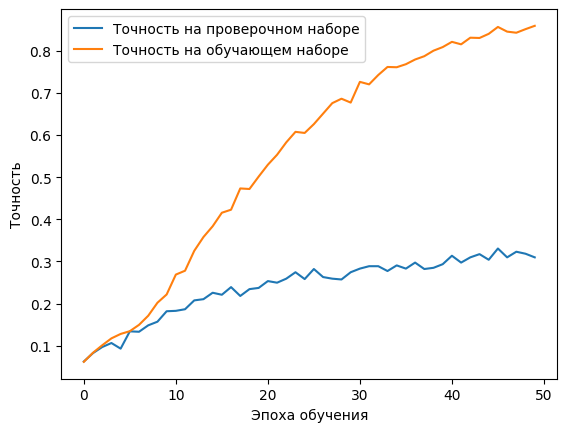

In [29]:
plt.plot(history2st_e.history['val_accuracy'], label='Точность на проверочном наборе')
plt.plot(history2st_e.history['accuracy'], label='Точность на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [8]:
model2st_d.save('model_class62d_acc85_35_50ec.h5')

In [84]:
#model1.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model2c = Sequential([
                    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(h, w, 3)),
                    MaxPool2D((2, 2)),
 

                    Conv2D(16,(3,3),
                           

                        padding='same',
                        activation='relu',
                    ),
                    MaxPool2D((2, 2)),
                    Dropout(0.25),

                    Conv2D(
                        filters=32,
                        kernel_size=(3,3),

                        padding='same',
                        activation='relu',
                    ),
                    MaxPool2D((2, 2)),
                    Dropout(0.25),

                    Conv2D(126, (5,5), padding='same', activation='relu'),
                    MaxPool2D((2, 2)),
                    Dropout(0.25),
                    
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(87, activation='softmax')
])

model2c.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model2c.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)       

In [29]:
history2=model2c.fit(train_data, epochs=100, validation_data=test_data)

Epoch 1/100
144/144 [==============================] - 47s 320ms/step - loss: 4.0884 - accuracy: 0.1012 - val_loss: 4.0795 - val_accuracy: 0.1048
Epoch 2/100
144/144 [==============================] - 45s 315ms/step - loss: 3.8554 - accuracy: 0.1517 - val_loss: 3.8214 - val_accuracy: 0.1602
Epoch 3/100
144/144 [==============================] - 46s 317ms/step - loss: 3.6633 - accuracy: 0.1642 - val_loss: 3.6752 - val_accuracy: 0.1640
Epoch 4/100
144/144 [==============================] - 45s 315ms/step - loss: 3.5156 - accuracy: 0.1774 - val_loss: 3.5786 - val_accuracy: 0.1736
Epoch 5/100
144/144 [==============================] - 45s 315ms/step - loss: 3.3366 - accuracy: 0.1947 - val_loss: 3.4781 - val_accuracy: 0.1801
Epoch 6/100
144/144 [==============================] - 45s 315ms/step - loss: 3.1913 - accuracy: 0.2183 - val_loss: 3.3963 - val_accuracy: 0.1843
Epoch 7/100
144/144 [==============================] - 46s 317ms/step - loss: 3.0066 - accuracy: 0.2438 - val_loss: 3.2755 -

Epoch 57/100
144/144 [==============================] - 45s 316ms/step - loss: 0.2310 - accuracy: 0.9340 - val_loss: 5.1109 - val_accuracy: 0.3692
Epoch 58/100
144/144 [==============================] - 46s 319ms/step - loss: 0.2523 - accuracy: 0.9278 - val_loss: 4.8433 - val_accuracy: 0.3654
Epoch 59/100
144/144 [==============================] - 46s 316ms/step - loss: 0.2173 - accuracy: 0.9308 - val_loss: 5.4762 - val_accuracy: 0.3427
Epoch 60/100
144/144 [==============================] - 46s 316ms/step - loss: 0.2536 - accuracy: 0.9201 - val_loss: 5.1543 - val_accuracy: 0.3524
Epoch 61/100
144/144 [==============================] - 46s 318ms/step - loss: 0.2520 - accuracy: 0.9259 - val_loss: 5.1690 - val_accuracy: 0.3503
Epoch 62/100
144/144 [==============================] - 46s 318ms/step - loss: 0.2705 - accuracy: 0.9150 - val_loss: 5.2997 - val_accuracy: 0.3541
Epoch 63/100
144/144 [==============================] - 46s 317ms/step - loss: 0.2800 - accuracy: 0.9125 - val_loss: 5

In [30]:
model2c.save('model_c87_acc95_36.h5')

In [19]:
loss, accuracy = model3.evaluate(dir_train, dir_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

IndexError: tuple index out of range